Testing the back normalscore transformation
========


In [1]:
#general imports
import matplotlib.pyplot as plt   
import pygslib as gslib    
from matplotlib.patches import Ellipse
import numpy as np
import pandas as pd

#make the plots inline
%matplotlib inline  

Getting the data ready for work
---------
If the data is in GSLIB format you can use the function `gslib.read_gslib_file(filename)` to import the data into a Pandas DataFrame. 


In [2]:
#get the data in gslib format into a pandas Dataframe
mydata= gslib.read_gslib_file('../datasets/cluster.dat')  

/home/adrian/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


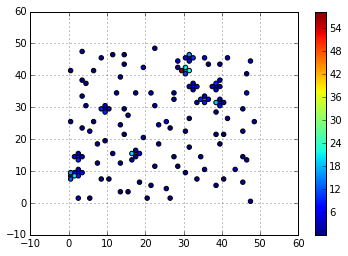

In [3]:
#view data in a 2D projection
plt.scatter(mydata['Xlocation'],mydata['Ylocation'], c=mydata['Primary'])
plt.colorbar()
plt.grid(True)
plt.show()

## The nscore transformation table function


In [5]:
print gslib.__dist_transf.backtr.__doc__

va,error = backtr(vnsc,transin,transout,ltail,utail,ltpar,utpar,zmin,zmax,getrank,[nd,nt])

Wrapper for ``backtr``.

Parameters
----------
vnsc : input rank-1 array('d') with bounds (nd)
transin : input rank-1 array('d') with bounds (nt)
transout : input rank-1 array('d') with bounds (nt)
ltail : input int
utail : input int
ltpar : input float
utpar : input float
zmin : input float
zmax : input float
getrank : input int

Other Parameters
----------------
nd : input int, optional
    Default: len(vnsc)
nt : input int, optional
    Default: len(transin)

Returns
-------
va : rank-1 array('d') with bounds (nd)
error : int



## Get the transformation table

In [6]:
transin,transout, error = gslib.__dist_transf.ns_ttable(mydata['Primary'],mydata['Declustering Weight'])
print 'there was any error?: ', error!=0

there was any error?:  False


##Get the normal score transformation

Note that the declustering is applied on the transformation tables

In [7]:
mydata['NS_Primary'] = gslib.__dist_transf.nscore(mydata['Primary'],transin,transout,getrank=False)

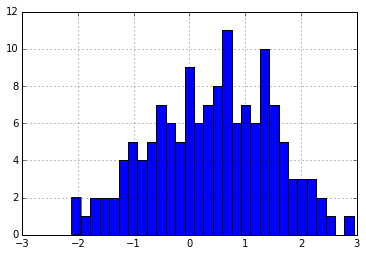

In [8]:
mydata['NS_Primary'].hist(bins=30)

## Doing the back transformation

In [10]:
mydata['NS_Primary_BT'],error = gslib.__dist_transf.backtr(mydata['NS_Primary'],
                                     transin,transout,
                                     ltail=1,utail=1,ltpar=0,utpar=60,
                                     zmin=0,zmax=60,getrank=False)
print 'there was any error?: ', error!=0, error

there was any error?:  False 0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff821697110>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff821363850>]], dtype=object)

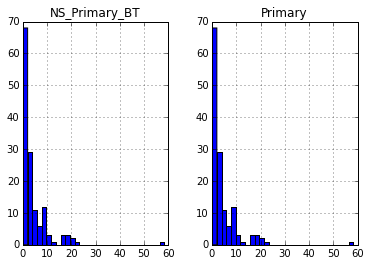

In [11]:
mydata[['Primary','NS_Primary_BT']].hist(bins=30)

In [13]:
mydata[['Primary','NS_Primary_BT', 'NS_Primary']]

,Primary,NS_Primary_BT,NS_Primary
0,0.06,0.060000,-2.111934
1,0.06,0.060000,-2.111931
2,0.08,0.080000,-1.908159
3,0.09,0.090001,-1.650879
4,0.09,0.090000,-1.650881
5,0.10,0.100001,-1.498796
6,0.10,0.100001,-1.498795
7,0.11,0.110000,-1.370496
8,0.11,0.110001,-1.370495
9,0.16,0.160001,-1.232542


## Comment

bacnscore call ndata times the function backtr. To get the backtransformation for a single value use this function like this


In [13]:
print 'The Z value of -2.5 is: ', gslib.__dist_transf.backtr(vrgs=-2.5,vr=transin,vrg=transout,zmin=0,zmax=60,ltail=1,ltpar=0,utail=1,utpar=60)
print 'The Z value of 2.5 is: ', gslib.__dist_transf.backtr(vrgs=2.5,vr=transin,vrg=transout,zmin=0,zmax=60,ltail=1,ltpar=0,utail=1,utpar=60)

The Z value of -2.5 is:  0.0600000346878
The Z value of 2.5 is:  21.7561123355
